In [ ]:
# First we will define a class for Radial Basis Function for a Function Approximation:

class RBF:
    def __init__(self, hidden_shape, sigma):
        self.hidden_shape = hidden_shape    #This is the number of RBFs
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def _kernel_function(self, center, data_point):
        return np.exp(-self.sigma*np.linalg.norm(center-data_point)**2)

    def _calculate_interpolation_matrix(self, x):
        matrix = np.zeros((len(x), self.hidden_shape))
        for data_point_arg, data_point in enumerate(x):
            for center_arg, center in enumerate(self.centers):
                matrix[data_point_arg, center_arg] = self._kernel_function(
                        center, data_point)
        return matrix

    def _select_centers(self, y):
        random_args = np.random.choice(len(y), self.hidden_shape)
        centers = y[random_args]
        return centers

    def fit(self, x, y):
        self.centers = self._select_centers(x)
        matrix = self._calculate_interpolation_matrix(x)
        self.weights = np.dot(np.linalg.pinv(matrix), y)

    def predict(self, x):
        matrix = self._calculate_interpolation_matrix(x)
        predictions = np.dot(matrix, self.weights)
        return predictions

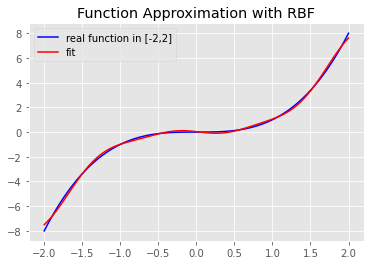

In [ ]:
# real function example (y=x³)
x = np.linspace(-2, 2, 100)
y = np.power(x, 3)

# number of RBFs = 8, sigma = 1.0
model = RBF(8, 1.0)

model.fit(x, y)
predicted_y = model.predict(x)

plt.plot(x, y, 'b-', label='real function in [-2,2]')
plt.plot(x, predicted_y, 'r-', label='fit')
plt.legend(loc='upper left')
plt.title('Function Approximation with RBF')
plt.show()